# Tarefa 02

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Carregue os dados da tarefa anterior

In [59]:
# bibliotecas

from pandas_datareader import data as web
import yfinance as yf
import plotly.express as px
from plotly import graph_objects

import pandas as pd
import numpy as np

In [60]:
%%time
ativos = '^BVSP'
dt_ini = '2022-06-03'

dados = yf.download(ativos, start=dt_ini)
print(dados)

[*********************100%%**********************]  1 of 1 completed

                    Open          High            Low         Close  \
Date                                                                  
2022-06-03  112392.00000  112392.00000  110935.000000  111102.00000   
2022-06-06  111102.00000  111935.00000  110015.000000  110186.00000   
2022-06-07  110185.00000  110435.00000  109394.000000  110070.00000   
2022-06-08  110067.00000  110142.00000  108045.000000  108368.00000   
2022-06-09  108367.00000  108510.00000  107068.000000  107094.00000   
...                  ...           ...            ...           ...   
2024-05-28  124498.00000  125392.00000  123537.000000  123780.00000   
2024-05-29  123780.00000  123780.00000  122458.000000  122707.00000   
2024-05-31  122704.00000  122837.00000  121929.000000  122098.00000   
2024-06-03  122100.00000  122495.00000  121496.000000  122032.00000   
2024-06-04  122031.65625  122031.65625  120878.359375  121778.03125   

               Adj Close    Volume  
Date                                
20

In [61]:
%%time
ativos = ['^BVSP', 'ITUB3.SA', 'PETR4.SA']
dt_ini = '2022-06-03'

# Baixa os dados dos ativos
dados = yf.download(ativos, start=dt_ini)

# Exibe as primeiras linhas dos dados obtidos
print(dados.head())

[*********************100%%**********************]  3 of 3 completed

Price       Adj Close                           Close                       \
Ticker       ITUB3.SA   PETR4.SA     ^BVSP   ITUB3.SA   PETR4.SA     ^BVSP   
Date                                                                         
2022-06-03  19.024782  16.629688  111102.0  21.969999  30.280001  111102.0   
2022-06-06  19.024782  16.640673  110186.0  21.969999  30.299999  110186.0   
2022-06-07  19.076740  16.838381  110070.0  22.030001  30.660000  110070.0   
2022-06-08  18.730366  16.756002  108368.0  21.629999  30.510000  108368.0   
2022-06-09  18.349348  16.514355  107094.0  21.190001  30.070000  107094.0   

Price            High                             Low                       \
Ticker       ITUB3.SA   PETR4.SA     ^BVSP   ITUB3.SA   PETR4.SA     ^BVSP   
Date                                                                         
2022-06-03  22.129999  30.440001  112392.0  21.879999  29.530001  110935.0   
2022-06-06  22.260000  30.530001  111935.0  21.860001  29.91000

In [62]:
# Quantidade de linhas e colunas dos últimos 2 anos

dados.shape

(499, 18)

In [63]:
# nome das colunas

dados.columns

MultiIndex([('Adj Close', 'ITUB3.SA'),
            ('Adj Close', 'PETR4.SA'),
            ('Adj Close',    '^BVSP'),
            (    'Close', 'ITUB3.SA'),
            (    'Close', 'PETR4.SA'),
            (    'Close',    '^BVSP'),
            (     'High', 'ITUB3.SA'),
            (     'High', 'PETR4.SA'),
            (     'High',    '^BVSP'),
            (      'Low', 'ITUB3.SA'),
            (      'Low', 'PETR4.SA'),
            (      'Low',    '^BVSP'),
            (     'Open', 'ITUB3.SA'),
            (     'Open', 'PETR4.SA'),
            (     'Open',    '^BVSP'),
            (   'Volume', 'ITUB3.SA'),
            (   'Volume', 'PETR4.SA'),
            (   'Volume',    '^BVSP')],
           names=['Price', 'Ticker'])

In [64]:
# verificando os dados

dados.head()

Price       Adj Close                           Close                       \
Ticker       ITUB3.SA   PETR4.SA     ^BVSP   ITUB3.SA   PETR4.SA     ^BVSP   
Date                                                                         
2022-06-03  19.024782  16.629688  111102.0  21.969999  30.280001  111102.0   
2022-06-06  19.024782  16.640673  110186.0  21.969999  30.299999  110186.0   
2022-06-07  19.076740  16.838381  110070.0  22.030001  30.660000  110070.0   
2022-06-08  18.730366  16.756002  108368.0  21.629999  30.510000  108368.0   
2022-06-09  18.349348  16.514355  107094.0  21.190001  30.070000  107094.0   

Price            High                             Low                       \
Ticker       ITUB3.SA   PETR4.SA     ^BVSP   ITUB3.SA   PETR4.SA     ^BVSP   
Date                                                                         
2022-06-03  22.129999  30.440001  112392.0  21.879999  29.530001  110935.0   
2022-06-06  22.260000  30.530001  111935.0  21.860001  29.910000  110015.0   
2022-06-07  22.030001  31.299999  110435.0  21.750000  30.160000  109394.0   
2022-06-08  21.959999  31.150000  110142.0  21.490000  30.330000  108045.0   
2022-06-09  21.600000  30.660000  108510.0  21.080000  29.980000  107068.0   

Price            Open                        Volume                      
Ticker       ITUB3.SA   PETR4.SA     ^BVSP ITUB3.SA  PETR4.SA     ^BVSP  
Date                                                                     
2022-06-03  22.000000  29.709999  112392.0   699800  60396900   8757500  
2022-06-06  22.040001  30.500000  111102.0   343600  39213900   8212400  
2022-06-07  21.889999  30.190001  110185.0   363600  80333700   9466200  
2022-06-08  21.780001  30.420000  110067.0   676100  65923900  10379900  
2022-06-09  21.600000  30.510000  108367.0   246300  53879000  11955500

In [65]:
# Verificar os tipos de dados em cada coluna do DataFrame

tipos_dados = dados.dtypes
print(tipos_dados)

Price      Ticker  
Adj Close  ITUB3.SA    float64
           PETR4.SA    float64
           ^BVSP       float64
Close      ITUB3.SA    float64
           PETR4.SA    float64
           ^BVSP       float64
High       ITUB3.SA    float64
           PETR4.SA    float64
           ^BVSP       float64
Low        ITUB3.SA    float64
           PETR4.SA    float64
           ^BVSP       float64
Open       ITUB3.SA    float64
           PETR4.SA    float64
           ^BVSP       float64
Volume     ITUB3.SA      int64
           PETR4.SA      int64
           ^BVSP         int64
dtype: object


In [66]:
# Criando um DataFrame a partir dos dados com MultiIndex nas colunas

columns = pd.MultiIndex.from_tuples(dados.keys(), names=['Price', 'Ticker'])
index = pd.date_range(start='2022-06-01', periods=5, freq='D')
df = pd.DataFrame(dados, index=index)

# Calculando a amplitude (High - Low) para cada ticker
high = df.xs('High', level='Price', axis=1)
low = df.xs('Low', level='Price', axis=1)
amplitude = high - low

# Adicionando a nova coluna de amplitude ao DataFrame original
amplitude.columns = pd.MultiIndex.from_product([['Amplitude'], amplitude.columns])
df = pd.concat([dados, amplitude], axis=1)

print(df)

            Adj Close                               Close             \
Ticker       ITUB3.SA   PETR4.SA         ^BVSP   ITUB3.SA   PETR4.SA   
2022-06-01        NaN        NaN           NaN        NaN        NaN   
2022-06-02        NaN        NaN           NaN        NaN        NaN   
2022-06-03  19.024782  16.629688  111102.00000  21.969999  30.280001   
2022-06-04        NaN        NaN           NaN        NaN        NaN   
2022-06-05        NaN        NaN           NaN        NaN        NaN   
...               ...        ...           ...        ...        ...   
2024-05-28  27.332088  37.799999  123780.00000  27.350000  37.799999   
2024-05-29  27.192179  37.750000  122707.00000  27.209999  37.750000   
2024-05-31  26.932350  38.790001  122098.00000  26.950001  38.790001   
2024-06-03  27.190001  38.580002  122032.00000  27.190001  38.580002   
2024-06-04  27.520000  38.070000  121778.03125  27.520000  38.070000   

                               High                            

#### 2. Média móvel

1. Faça uma média móvel  em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu
2. Utilizando a fução ```rolling()```, calcule o desvio pardão desses ativos ao longo do tempo, utilizando a mesma janela móvel do item acima
2. Monte um gráfico de linhas para as médias móveis dos ativos da sua base
4. Monte um gráfico de linhas para os desvios padrão em janela móvel
5. Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.

In [72]:
# média móvel de 90 dias

df_retorno_mean90 = df['Adj Close'].pct_change(fill_method=None)
df_retorno_mean90 = df_retorno_mean90.rolling(90).mean()
df_retorno_mean90_vertical = df_retorno_mean90.stack().reset_index()
df_retorno_mean90_vertical.columns = ['data', 'ativo', 'valor']

In [73]:
#  desvio padrão móvel de 90 dias

df_retornos_dp90 = df['Adj Close'].pct_change(fill_method=None)
df_retornos_dp90 = df_retornos_dp90.rolling(window=90).std()
df_retornos_dp90_vertical = df_retornos_dp90.stack().reset_index()
df_retornos_dp90_vertical.columns = ['data', 'ativo', 'valor']


C:\Users\Cristina\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



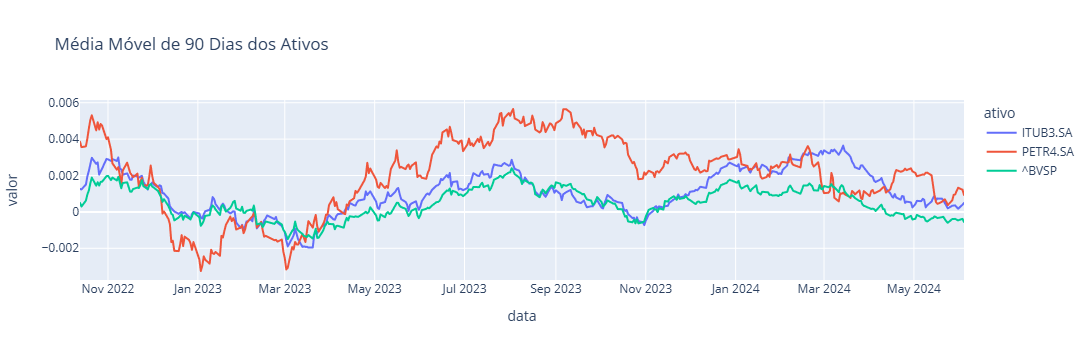

In [74]:
# gráfico para "média móvel

fig_media_movel = px.line(df_retorno_mean90_vertical, x='data', y='valor', color='ativo', title='Média Móvel de 90 Dias dos Ativos')
fig_media_movel.show()


C:\Users\Cristina\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



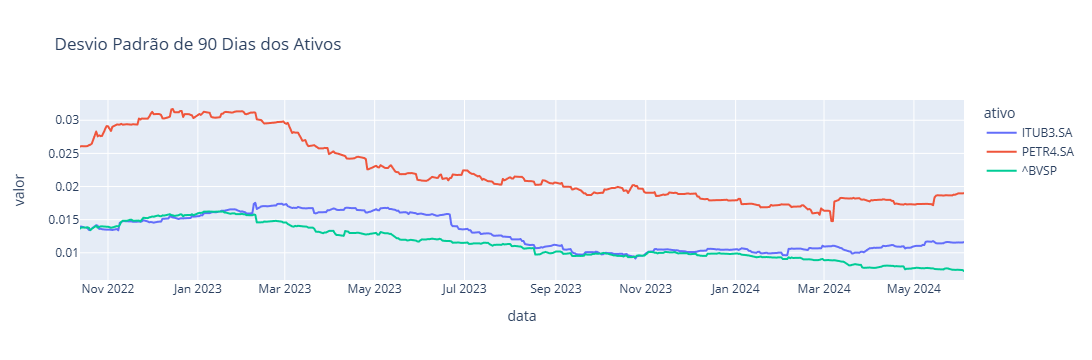

In [71]:
# gráfico para "desvio padrão"

fig_desvio_padrao  = px.line(df_retornos_dp90_vertical, x="data", y="valor", color='ativo', title='Desvio Padrão de 90 Dias dos Ativos')
fig_desvio_padrao .show()

In [ ]:
# Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes 
# quanto aos períodos de maior volatilidade (variação) dos ativos.

### A média móvel afere a tendência, pois retira as flutuações diárias e ruídos;
### O desvio padrão é uma medida de volatilidade que indica o quanto os valores em uma série de dados tendem a se desviar da média;
### No campo dos investimentos em ativos a média móvel direciona para tendência de alta ou queda, enquanto que, o devio padrão mostra o quanto 
### determinado ativo é varia em relação à sua média.
### Ao observarmos os fráficos notamos que a média móvel é relativamente estável e o desvio padrão tende a diminuir. Podemos afirmar, baseados
### no gráficos que os ativos seguem uma tendência de estabilidade sem grandes surpresas.

#### 3. Gráfico de *candlestick*
1. Selecione o período dos últimos 60 dias (corridos) para um dos ativos da sua base
2. Monte um gráfico de *candlestick* para esses dados.

In [97]:
df.columns

MultiIndex([('Adj Close', 'ITUB3.SA'),
            ('Adj Close', 'PETR4.SA'),
            ('Adj Close',    '^BVSP'),
            (    'Close', 'ITUB3.SA'),
            (    'Close', 'PETR4.SA'),
            (    'Close',    '^BVSP'),
            (     'High', 'ITUB3.SA'),
            (     'High', 'PETR4.SA'),
            (     'High',    '^BVSP'),
            (      'Low', 'ITUB3.SA'),
            (      'Low', 'PETR4.SA'),
            (      'Low',    '^BVSP'),
            (     'Open', 'ITUB3.SA'),
            (     'Open', 'PETR4.SA'),
            (     'Open',    '^BVSP'),
            (   'Volume', 'ITUB3.SA'),
            (   'Volume', 'PETR4.SA'),
            (   'Volume',    '^BVSP'),
            ('Amplitude', 'ITUB3.SA'),
            ('Amplitude', 'PETR4.SA'),
            ('Amplitude',    '^BVSP')],
           names=[None, 'Ticker'])

In [98]:
# criando lista de indicadores

lista_indicadores = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
ativo = ['^BVSP']*len(lista_indicadores)

In [99]:
# usando o "zip" para concatenar

colunas = list(zip(lista_indicadores, ativo))

In [100]:
# pegando um único índice dos últimos 60 dias

bvsp = df.loc['04/03/2024':,colunas]
bvsp.columns = lista_indicadores

In [101]:
bvsp.head()

,Adj Close,Close,High,Low,Open,Volume
2024-04-03,127318.0,127318.0,127694.0,126181.0,127546.0,11032700.0
2024-04-04,127428.0,127428.0,129627.0,127178.0,127313.0,13229200.0
2024-04-05,126795.0,126795.0,127432.0,126394.0,127422.0,9101300.0
2024-04-08,128857.0,128857.0,129178.0,126796.0,126796.0,8128300.0
2024-04-09,129890.0,129890.0,129956.0,128826.0,128858.0,8489700.0


In [102]:
# criando o dicionário

graph = {
    'x': bvsp.index,
    'open': bvsp.Open,
    'close': bvsp.Close,
    'high': bvsp.High,
    'low': bvsp.Low,
    'type': 'candlestick',
    'name': '^BVSP',
    'showlegend': True
}

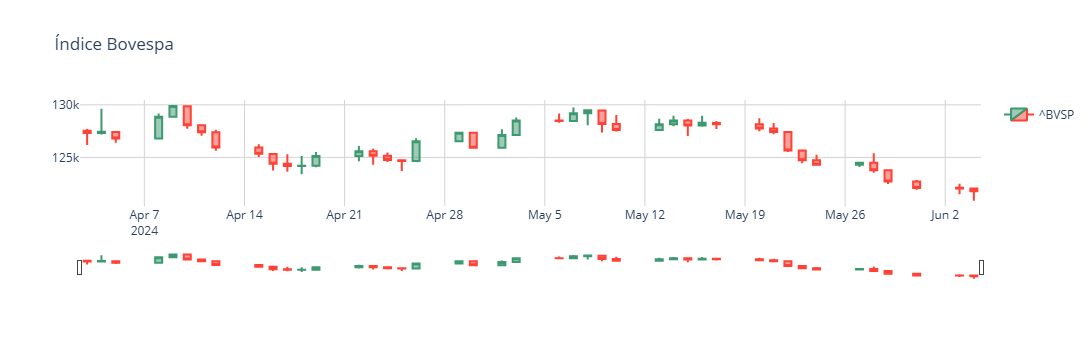

In [103]:
# utilizando a função graph_objects do plotly

from plotly import graph_objects
from plotly.graph_objs import Layout

layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

grafico = graph_objects.Figure(
    data = [graph],
    layout_title="Índice Bovespa",
    layout=layout
)
grafico.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
grafico.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

grafico